In [235]:
import pandas as pd
A=pd.read_csv("C:/Users/adv/Downloads/loan_training_set.csv")
from warnings import filterwarnings
filterwarnings("ignore")

In [236]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [237]:
Y=A.Loan_Status

In [238]:
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)

In [239]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        c=X[i].mode()[0]
        X[i]=X[i].fillna(c)
        cat.append(i)
    else:
        c=X[i].mean()
        X[i]=X[i].fillna(c)
        con.append(i)
        

In [240]:
cat


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [241]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [242]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [243]:
X1=X[con]

In [244]:
X2=pd.get_dummies(X[cat])

In [245]:
Xnew=X1.join(X2)

In [246]:
Xnew.shape

(614, 20)

In [247]:
Y.shape

(614,)

In [248]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=20)

In [249]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="entropy",random_state=20)
model=dc.fit(xtrain,ytrain)
tr_pred=model.predict(xtrain)
ts_pred=model.predict(xtest)

from sklearn.metrics import accuracy_score
ts_err=accuracy_score(ytest,ts_pred)
tr_err=accuracy_score(ytrain,tr_pred)

In [250]:
ts_err

0.6422764227642277

In [251]:
tr_err

1.0

In [252]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ts_pred)

In [253]:
cm

array([[24, 27],
       [17, 55]], dtype=int64)

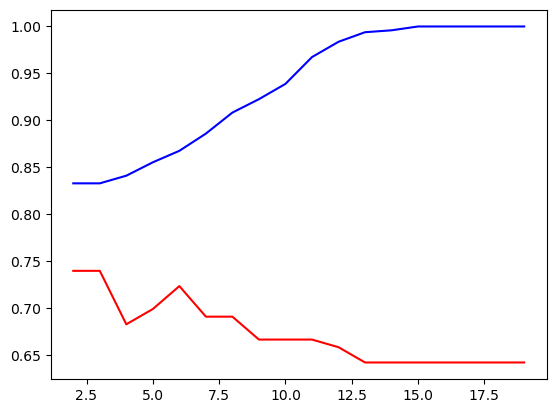

In [254]:
tr1 = []
ts1 = []
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dc1 = DecisionTreeClassifier(criterion="entropy",random_state=20,max_depth=i)
    model1 = dc1.fit(xtrain,ytrain)
    tr_pred1=model1.predict(xtrain)
    ts_pred1=model1.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err1=accuracy_score(ytest,ts_pred1)
    tr_err1=accuracy_score(ytrain,tr_pred1)
    tr1.append(tr_err1)
    ts1.append(ts_err1)


import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr1,c="blue")
plt.plot(range(2,20,1),ts1,c="red")



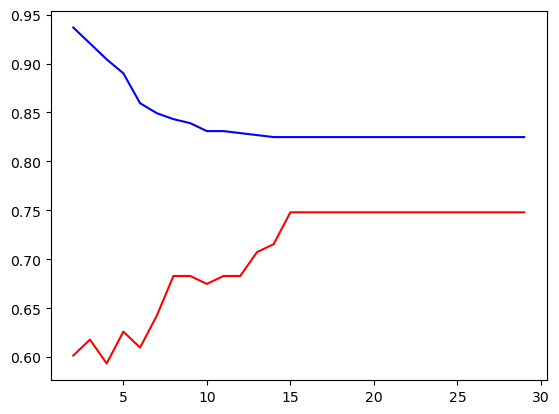

In [255]:
tr2 = []
ts2 = []
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dc2 = DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_leaf=i)
    model2 = dc2.fit(xtrain,ytrain)
    tr_pred2=model2.predict(xtrain)
    ts_pred2=model2.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err2=accuracy_score(ytest,ts_pred2)
    tr_err2=accuracy_score(ytrain,tr_pred2)
    tr2.append(tr_err2)
    ts2.append(ts_err2)


import matplotlib.pyplot as plt
plt.plot(range(2,30,1),tr2,c="blue")
plt.plot(range(2,30,1),ts2,c="red")

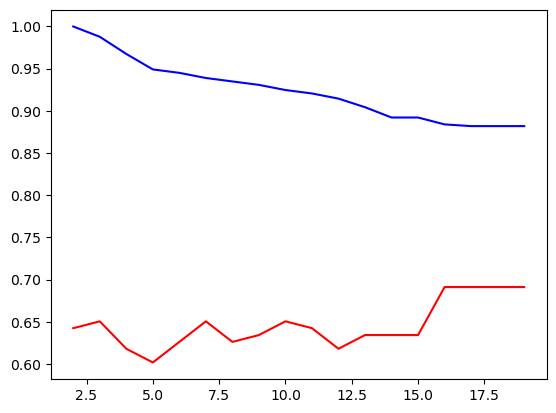

In [256]:
tr3 = []
ts3 = []
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dc3 = DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_split=i)
    model3 = dc3.fit(xtrain,ytrain)
    tr_pred3=model3.predict(xtrain)
    ts_pred3=model3.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err3=accuracy_score(ytest,ts_pred3)
    tr_err3=accuracy_score(ytrain,tr_pred3)
    tr3.append(tr_err3)
    ts3.append(ts_err3)


import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr3,c="blue")
plt.plot(range(2,20,1),ts3,c="red")

In [257]:
from sklearn.tree import DecisionTreeClassifier
dc4 = DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_split=16,min_samples_leaf=16,max_depth=2)
model4 = dc4.fit(xtrain,ytrain)
tr_pred4=model4.predict(xtrain)
ts_pred4=model4.predict(xtest)
from sklearn.metrics import accuracy_score
ts_err4=accuracy_score(ytest,ts_pred4)
tr_err4=accuracy_score(ytrain,tr_pred4)


In [258]:
print(ts_err4,tr_err4)

0.7479674796747967 0.824847250509165


In [259]:
cm1=confusion_matrix(ytest,ts_pred4)

In [260]:
cm1

array([[20, 31],
       [ 0, 72]], dtype=int64)

In [261]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=40,criterion="entropy",random_state=20)
model12=rfr.fit(xtrain,ytrain)
tr_pred12=model12.predict(xtrain)
ts_pred12=model12.predict(xtest)
from sklearn.metrics import accuracy_score
ts_err12=accuracy_score(ytest,ts_pred12)
tr_err12=accuracy_score(ytrain,tr_pred12)

In [262]:
ts_err12

0.7317073170731707

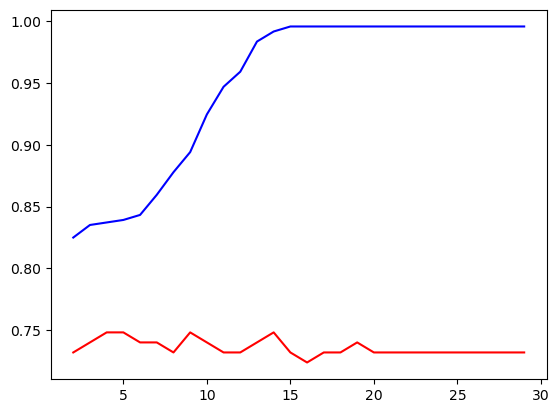

In [263]:
tr13 = []
ts13 = []
for i in range(2,30,1):
    from sklearn.ensemble import RandomForestClassifier
    rfr=RandomForestClassifier(n_estimators=40,criterion="entropy",random_state=20,max_depth=i)
    model13=rfr.fit(xtrain,ytrain)
    tr_pred13=model13.predict(xtrain)
    ts_pred13=model13.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err13=accuracy_score(ytest,ts_pred13)
    tr_err13=accuracy_score(ytrain,tr_pred13)
    tr13.append(tr_err13)
    ts13.append(ts_err13)

import matplotlib.pyplot as plt
plt.plot(range(2,30,1),tr13,c="blue")
plt.plot(range(2,30,1),ts13,c="red")

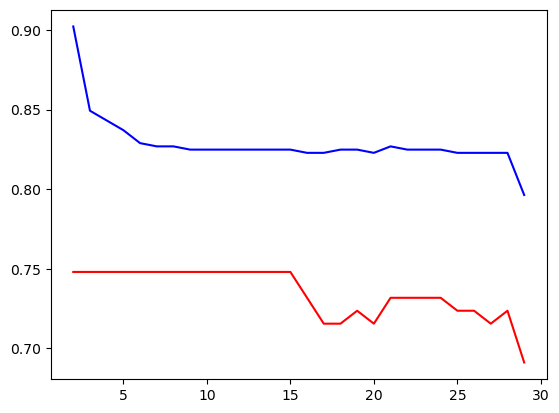

In [264]:
tr14 = []
ts14 = []
for i in range(2,30,1):
    from sklearn.ensemble import RandomForestClassifier
    rfr=RandomForestClassifier(n_estimators=40,criterion="entropy",random_state=20,min_samples_leaf=i)
    model14=rfr.fit(xtrain,ytrain)
    tr_pred14=model14.predict(xtrain)
    ts_pred14=model14.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err14=accuracy_score(ytest,ts_pred14)
    tr_err14=accuracy_score(ytrain,tr_pred14)
    tr14.append(tr_err14)
    ts14.append(ts_err14)

import matplotlib.pyplot as plt
plt.plot(range(2,30,1),tr14,c="blue")
plt.plot(range(2,30,1),ts14,c="red")

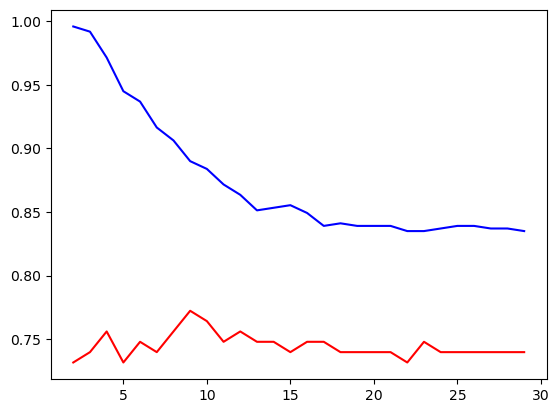

In [265]:
tr15 = []
ts15 = []
for i in range(2,30,1):
    from sklearn.ensemble import RandomForestClassifier
    rfr=RandomForestClassifier(n_estimators=40,criterion="entropy",random_state=20,min_samples_split=i)
    model15=rfr.fit(xtrain,ytrain)
    tr_pred15=model15.predict(xtrain)
    ts_pred15=model15.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err15=accuracy_score(ytest,ts_pred15)
    tr_err15=accuracy_score(ytrain,tr_pred15)
    tr15.append(tr_err15)
    ts15.append(ts_err15)

import matplotlib.pyplot as plt
plt.plot(range(2,30,1),tr15,c="blue")
plt.plot(range(2,30,1),ts15,c="red")

In [266]:
#at optimum parameters condition as max_depth=5, min_samples_leaf=15, min_samples_split=16
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=40,criterion="entropy",random_state=21,min_samples_split=16,max_depth=5)
model16=rfr.fit(xtrain,ytrain)
tr_pred16=model16.predict(xtrain)
ts_pred16=model16.predict(xtest)
from sklearn.metrics import accuracy_score
ts_err16=accuracy_score(ytest,ts_pred16)
tr_err16=accuracy_score(ytrain,tr_pred16)


In [267]:
ts_err16

0.7479674796747967

In [268]:
tr_err16

0.8289205702647657

In [269]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dc5=DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_split=16,min_samples_leaf=16,max_depth=3)
abc=AdaBoostClassifier(dc5,n_estimators=40)
model5=abc.fit(xtrain,ytrain)
tr_pred5=model5.predict(xtrain)
ts_pred5=model5.predict(xtest)
from sklearn.metrics import accuracy_score
ts_err5=accuracy_score(ytest,ts_pred5)
tr_err5=accuracy_score(ytrain,tr_pred5)

In [270]:
print(ts_err5,tr_err5)

0.6991869918699187 0.9938900203665988


In [271]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dc6=DecisionTreeClassifier(criterion="entropy",random_state=20)
abc=AdaBoostClassifier(dc6,n_estimators=40)
model6=abc.fit(xtrain,ytrain)
tr_pred6=model6.predict(xtrain)
ts_pred6=model6.predict(xtest)
from sklearn.metrics import accuracy_score
ts_err6=accuracy_score(ytest,ts_pred6)
tr_err6=accuracy_score(ytrain,tr_pred6)
print(ts_err5,tr_err5)

0.6991869918699187 0.9938900203665988


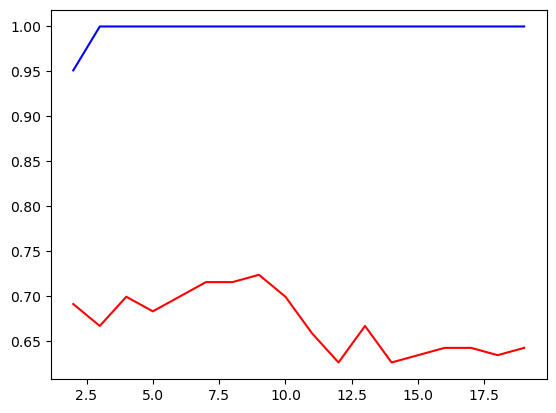

In [272]:
tr7 = []
ts7 = []
for i in range(2,20,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dc7=DecisionTreeClassifier(criterion="entropy",random_state=20,max_depth=i)
    abc=AdaBoostClassifier(dc7,n_estimators=40)
    model7=abc.fit(xtrain,ytrain)
    tr_pred7=model7.predict(xtrain)
    ts_pred7=model7.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err7=accuracy_score(ytest,ts_pred7)
    tr_err7=accuracy_score(ytrain,tr_pred7)
    tr7.append(tr_err7)
    ts7.append(ts_err7)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr7,c="blue")
plt.plot(range(2,20,1),ts7,c="red")

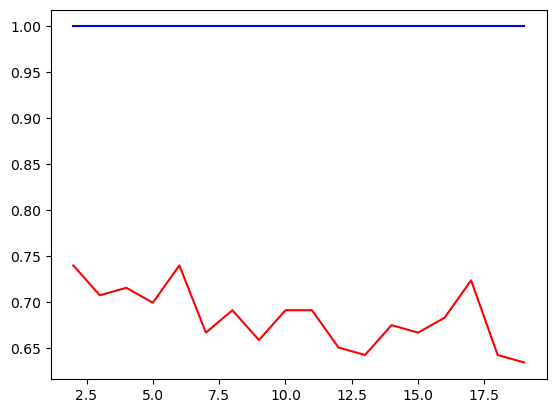

In [273]:
tr8 = []
ts8 = []
for i in range(2,20,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dc8=DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_leaf=i)
    abc=AdaBoostClassifier(dc8,n_estimators=30)
    model8=abc.fit(xtrain,ytrain)
    tr_pred8=model8.predict(xtrain)
    ts_pred8=model8.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err8=accuracy_score(ytest,ts_pred8)
    tr_err8=accuracy_score(ytrain,tr_pred8)
    tr8.append(tr_err8)
    ts8.append(ts_err8)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr8,c="blue")
plt.plot(range(2,20,1),ts8,c="red")

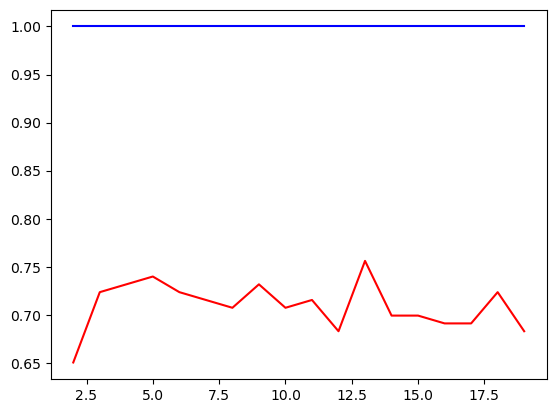

In [274]:
tr9 = []
ts9 = []
for i in range(2,20,1):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    dc9=DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_split=i)
    abc=AdaBoostClassifier(dc9,n_estimators=30)
    model9=abc.fit(xtrain,ytrain)
    tr_pred9=model9.predict(xtrain)
    ts_pred9=model9.predict(xtest)
    from sklearn.metrics import accuracy_score
    ts_err9=accuracy_score(ytest,ts_pred9)
    tr_err9=accuracy_score(ytrain,tr_pred9)
    tr9.append(tr_err9)
    ts9.append(ts_err9)
import matplotlib.pyplot as plt
plt.plot(range(2,20,1),tr9,c="blue")
plt.plot(range(2,20,1),ts9,c="red")

# maximum accuracy obtained

In [275]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dc10=DecisionTreeClassifier(criterion="entropy",random_state=20,min_samples_split=6,min_samples_leaf=5,max_depth=4)
abc=AdaBoostClassifier(dc10,n_estimators=30)
model10=abc.fit(xtrain,ytrain)
tr_pred10=model10.predict(xtrain)
ts_pred10=model10.predict(xtest)
from sklearn.metrics import accuracy_score
ts_err10=accuracy_score(ytest,ts_pred10)
tr_err10=accuracy_score(ytrain,tr_pred10)
print(ts_err10,tr_err10)

0.7560975609756098 1.0


In [276]:
xtrain.shape

(491, 20)

In [277]:
ytrain.shape

(491,)

In [278]:
def chi(A,YY,ii):
    from scipy.stats import chi2_contingency
    q=pd.crosstab(A[YY],A[ii])
    chisq,pvalue,df,contg=chi2_contingency(q)
    return pvalue
def anooova(A,YY,ii):
    from statsmodels.stats.anova import anova_lm
    from statsmodels.formula.api import ols
    tt=str(YY)+"~"+str(ii)
    mod=ols("LoanAmount ~ Loan_Status ",HH).fit()
    v=anova_lm(mod)
    w=round(v.iloc[0:1,4:5].values[0][0],5)
    return w
    

In [279]:
cat1=[]
con1=[]
HH=A
for i in HH.columns:
    if(HH[i].dtypes=="object"):
        c=HH[i].mode()[0]
        HH[i]=HH[i].fillna(c)
        cat1.append(i)
    else:
        c=HH[i].mean()
        HH[i]=HH[i].fillna(c)
        con1.append(i)

In [280]:
con1

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [281]:
pval=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        pv=chi(HH,"Loan_Status",i)
        pval.append(pv)
    else:
        pv=anooova(HH,"Loan_Status",i)
        pval.append(pv)




In [282]:
ss=pd.DataFrame(X.columns,columns=["col"])

In [283]:
ss["pvalue"]=pval

In [284]:
ss.sort_values(by="pvalue")

,col,pvalue
10,Property_Area,0.002136
1,Married,0.029609
3,Education,0.043100
5,ApplicantIncome,0.367690
6,CoapplicantIncome,0.367690
7,LoanAmount,0.367690
8,Loan_Amount_Term,0.367690
9,Credit_History,0.367690
2,Dependents,0.368866
0,Gender,0.739146


In [285]:
ss[ss.pvalue<0.05]

,col,pvalue
1,Married,0.029609
3,Education,0.043100
10,Property_Area,0.002136


In [286]:
XXnew=HH[["Married","Education","Property_Area"]]

In [287]:
XXnew1=pd.get_dummies(XXnew)

In [288]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(XXnew1,Y,test_size=0.2,random_state=20)

In [289]:
from sklearn.linear_model import LogisticRegression
lir=LogisticRegression()
model11=lir.fit(xtrain1,ytrain1)
ts_pred11=model11.predict(xtest1)
tr_pred11=model11.predict(xtrain1)
from sklearn.metrics import accuracy_score
ts_err11=accuracy_score(ytest1,ts_pred11)
tr_err11=accuracy_score(ytrain1,tr_pred11)

In [290]:
ts_err11

0.5691056910569106

In [291]:
tr_err11

0.7107942973523421

At maximum accuracy score obtained by optimum condition adaboost clasifier
hence predicting the value for testing set using this model

In [292]:
BB=pd.read_csv("C:/Users/adv/Downloads/testing_set.csv")

In [293]:
BB22=BB.drop(labels="Loan_ID",axis=1)

In [294]:
cat2=[]
con2=[]
for i in BB22.columns:
    if(BB22[i].dtypes=="object"):
        c=BB22[i].mode()[0]
        BB22[i]=BB22[i].fillna(c)
        cat2.append(i)
    else:
        c=BB22[i].mean()
        BB22[i]=BB22[i].fillna(c)
        con2.append(i)
        

In [295]:
BB1=pd.get_dummies(BB22[cat2])

In [296]:
BB2=BB22[con2]

In [297]:
Xbb=BB1.join(BB2)

In [298]:
final=model10.predict(Xbb)

In [299]:
finalcsv=pd.DataFrame(BB.Loan_ID)

In [300]:
finalcsv["Loan_Status"]=final

In [301]:
finalcsv.to_csv("C:/Users/adv/Downloads/project2_submission_classification.csv")

In [316]:
vv=BB22[(BB22.Loan_Status=="N")]

In [318]:
ytest1234=vv.LoanAmount

In [319]:
xtest1234=vv.drop(labels=["LoanAmount"],axis=1)

In [331]:
AA

""


""


In [326]:
ytrain1234=AA[(AA.Loan_Status=="Y")].LoanAmount

AttributeError: 'DataFrame' object has no attribute 'Loan_Status'